<a href="https://colab.research.google.com/github/Kyamzzz/GISMA/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the dataset:

Ever wondered how salaries in the Data Science world have evolved between 2021 and 2023? This dataset offers a peek into that journey. Furthermore it dives deeper into various facets of employment like years of experience, job roles, and where these companies are based. It's like a treasure trove for anyone curious about how Data Science paychecks have changed in the industry.

Using this data, I'm going to visually explore the salary landscape for Data Sciencinsts in 2023. We'll spot trends, compare roles, and even see how company sizes play a part. These analysis and visualisations will be helpful whether you're a job hunter, an employer, or just a data enthusiast. This exploration promises insights that could shape your next move in the Data Science realm.



Data Downloaded from:
www.kaggle.com. (n.d.). 💰 Data Science Salary 💰 2021 to 2023. [online] Available at: https://www.kaggle.com/datasets/harishkumardatalab/data-science-salary-2021-to-2023?resource=download [Accessed 18 Sep. 2023].

‌

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Data.csv')

# Display the first few rows of the dataset
data.head()

work_year experience_level employment_type                job_title  \
0       2023               EN              FT        Applied Scientist   
1       2023               EN              FT        Applied Scientist   
2       2023               EN              FT     Data Quality Analyst   
3       2023               EN              FT  Compliance Data Analyst   
4       2023               EN              FT        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US            L  
1  130760             USD         130760               US            L  
2  100000             USD         100000               NG            L  
3   30000             USD          30000               NG            L  
4  204620             USD         204620               US            L

##Data Exploration

In [ ]:
# Basic information about the dataset
info = data.info()

# Shape of the dataset
shape = data.shape

# Descriptive statistics
describe = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicates = data.duplicated().sum()

shape, missing_values, duplicates, describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


((3761, 9),
 work_year           0
 experience_level    0
 employment_type     0
 job_title           0
 salary              0
 salary_currency     0
 salary_in_usd       0
 company_location    0
 company_size        0
 dtype: int64,
 1351,
           work_year experience_level employment_type      job_title  \
 count   3761.000000             3761            3761           3761   
 unique          NaN                4               4             93   
 top             NaN               SE              FT  Data Engineer   
 freq            NaN             2518            3724           1040   
 mean    2022.374103              NaN             NaN            NaN   
 std        0.691252              NaN             NaN            NaN   
 min     2020.000000              NaN             NaN            NaN   
 25%     2022.000000              NaN             NaN            NaN   
 50%     2022.000000              NaN             NaN            NaN   
 75%     2023.000000              NaN  

In [ ]:
print('\nShape of the Dataset:')
print('-' * 50)
print(shape)
print('\nMissing Values:')
print('-' * 50)
print(missing_values)
print('\nNumber of Duplicates:')
print('-' * 50)
print(duplicates)


Shape of the Dataset:
--------------------------------------------------
(3761, 9)

Missing Values:
--------------------------------------------------
work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

Number of Duplicates:
--------------------------------------------------
1351


In [ ]:
# Remove duplicate rows from the dataset
data_cleaned = data.drop_duplicates()

# Check the shape of the cleaned dataset
cleaned_shape = data_cleaned.shape
cleaned_shape

(2410, 9)

## Exploratory Data Analysis

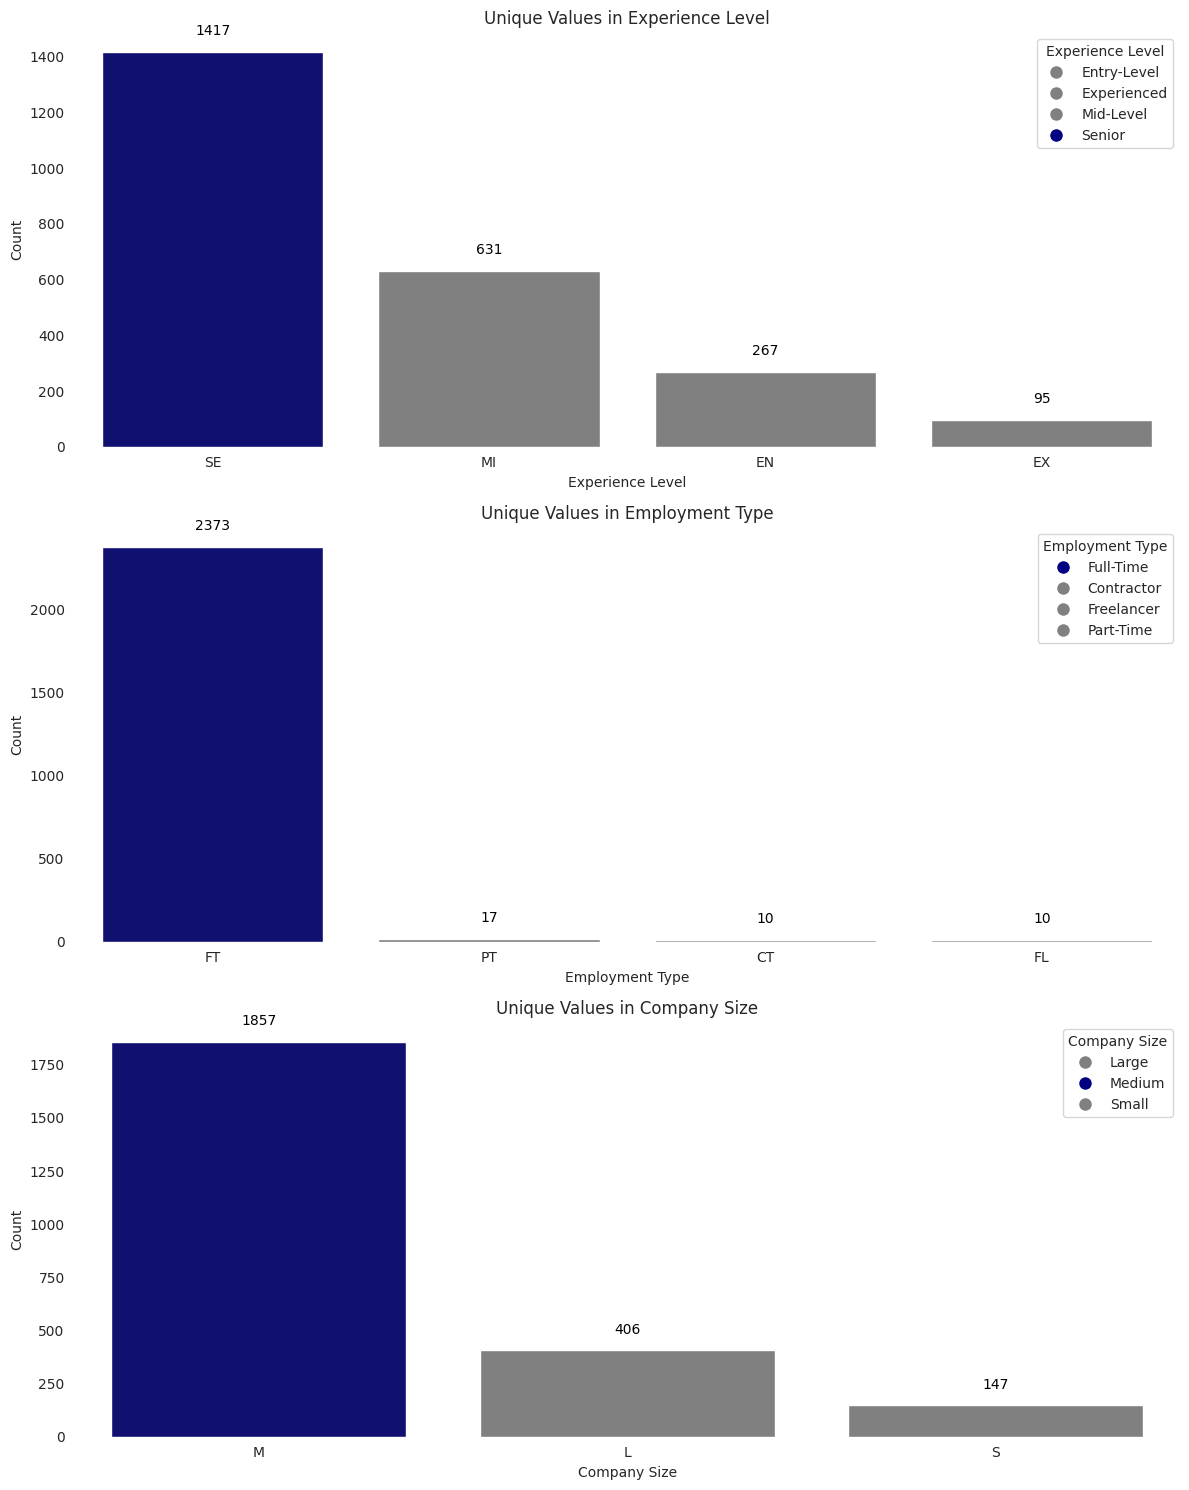

In [ ]:
# Define the columns we want to visualize
columns_to_visualize = ['experience_level', 'employment_type', 'company_size']

# Define mappings for full forms of the terms
experience_mapping = {'EN': 'Entry-Level', 'EX': 'Experienced', 'MI': 'Mid-Level', 'SE': 'Senior'}
employment_mapping = {'FT': 'Full-Time', 'CT': 'Contractor', 'FL': 'Freelancer', 'PT': 'Part-Time'}
company_size_mapping = {'L': 'Large', 'M': 'Medium', 'S': 'Small'}

# Create vertical bar graphs with adjusted labels, legends, and annotations
fig, axes = plt.subplots(nrows=len(columns_to_visualize), figsize=(12, 15))

for i, col in enumerate(columns_to_visualize):
    # Get the order of bars based on their counts
    order = data_cleaned[col].value_counts().index

    # Create a color list where the highest bar is navy and others are grey
    colors = ['navy' if x == order[0] else 'grey' for x in order]

    sns.countplot(x=col, data=data_cleaned, ax=axes[i], order=order, palette=colors)
    axes[i].set_title(f'Unique Values in {col.replace("_", " ").title()}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_facecolor('white')
    axes[i].grid(False)

    # Remove the black border (spines)
    for spine in axes[i].spines.values():
        spine.set_visible(False)

    # Add annotations to the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 10),
                        textcoords='offset points')

    # Add legends based on the column with colors reflecting the bars
    if col == 'experience_level':
        handles = [plt.Line2D([0], [0], color='white', markerfacecolor=('navy' if key == order[0] else 'grey'), marker='o', markersize=10, label=value) for key, value in experience_mapping.items()]
        axes[i].legend(handles=handles, title='Experience Level', loc='upper right')
    elif col == 'employment_type':
        handles = [plt.Line2D([0], [0], color='white', markerfacecolor=('navy' if key == order[0] else 'grey'), marker='o', markersize=10, label=value) for key, value in employment_mapping.items()]
        axes[i].legend(handles=handles, title='Employment Type', loc='upper right')
    elif col == 'company_size':
        handles = [plt.Line2D([0], [0], color='white', markerfacecolor=('navy' if key == order[0] else 'grey'), marker='o', markersize=10, label=value) for key, value in company_size_mapping.items()]
        axes[i].legend(handles=handles, title='Company Size', loc='upper right')

plt.tight_layout()
plt.show()



Key findings from Bargraph

*   In terms of Experience level most of the Data
Scientists are working on a senior level followed by Mid level and then entry level.

*   In terms of Employment Type, most of them are Full time employed suggesting that most data science professionals prefer or are offered full-time roles.

*   In terms of company size Medium Size organisations have employed highest number of Data Scientists followed by Large Scale organisation.






  






In [ ]:
average_salary = data.groupby(["experience_level", "employment_type"])["salary_in_usd"].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary

experience_level employment_type  salary_in_usd
4                EX              CT  416000.000000
5                EX              FT  192974.566372
12               SE              FT  153225.744528
8                MI              FT  105336.726131
10               SE              CT   97500.000000
2                EN              FT   80496.529801
6                MI              CT   78600.000000
1                EN              FL   75000.000000
0                EN              CT   65234.500000
11               SE              FL   53333.333333
9                MI              PT   42561.000000
7                MI              FL   41615.600000
3                EN              PT   38885.000000

In [ ]:
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

# Employment type labels with full forms
employment_mapping_full = {
    'FT': 'FT - Full-Time',
    'CT': 'CT - Contractor',
    'FL': 'FL - Freelancer',
    'PT': 'PT - Part-Time'
}
average_salary['employment_type'] = average_salary['employment_type'].map(employment_mapping_full)

# Create an interactive bar plot using Plotly with the updated labels
fig = px.bar(average_salary, x='experience_level', y='salary_in_usd',
             color='employment_type', barmode='group',
             title='Average Salary by Experience Level and Employment Type',
             labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Average Salary (in USD)', 'employment_type': 'Employment Type'},
             hover_data=['salary_in_usd'])

# Show the plot
fig.show()


Key finding from the bar plot

Experienced Professionals Earn the Most: As we can see
Expereinced professionals earn more than senior level employees stating that experience matters more than seniority level in the field of data science.

Full-Time Employment Dominates: For all experience levels, full-time employment offers the highest average salary. The only exception is Expereinced Contractors. This might indicate that companies are willing to pay a premium for specialized skills on a contractual basis. Also overall, the plot suggests that full-time roles provide better compensation packages compared to other types of employment.

Freelancers Earn Less: Freelancers, especially at the entry and mid-level, tend to earn less on average compared to their counterparts in full-time or contractor roles. This could be due to the variability in projects and the lack of consistent work.

Contractor Roles are Competitive: For mid and senior-level professionals, contractor roles offer competitive salaries, often close to or surpassing full-time roles. This might indicate that companies are willing to pay a premium for specialized skills on a contractual basis.

Entry-Level Salaries are Consistent: The average salaries for entry-level data scientists are relatively consistent across different employment types, with full-time roles slightly leading.

Experience Matters: There's a clear upward trend in average salaries as we move from entry-level to senior-level, emphasizing the value of experience in the data science field.

### Question 1. How has the average salary for data science professionals changed from 2021 to 2023?

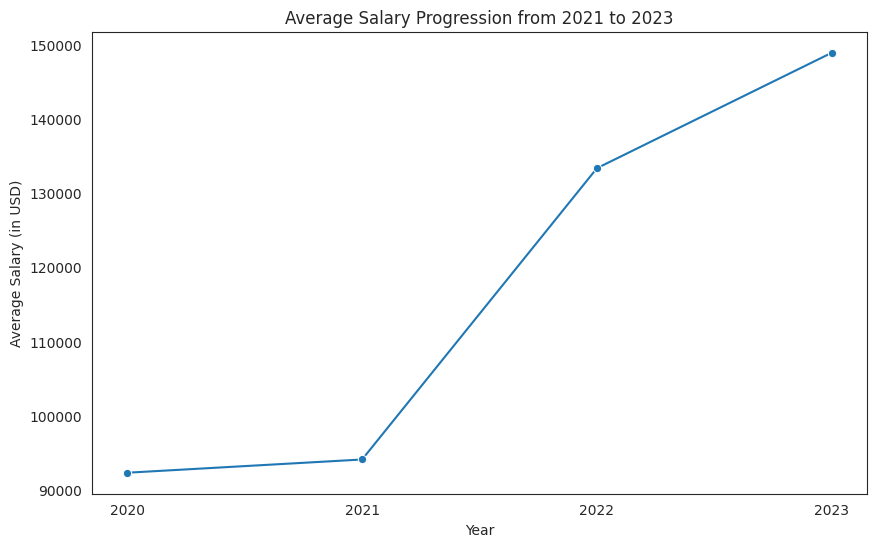

In [ ]:
# Calculate the average salary for each year
yearly_avg_salary = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Now, you can run the plotting code:

# Set the style for the plot to white background
sns.set_style('white')

# Plot the average salary progression over time with a white background
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_salary, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary Progression from 2021 to 2023')
plt.xlabel('Year')
plt.ylabel('Average Salary (in USD)')
plt.xticks(yearly_avg_salary['work_year'])
plt.show()


As we can clearly see the progression that the average salary for Data Science roles is increasing at a rapid rate showing that the demand for these roles will continue to grow further.

### Question 2. Do larger companies tend to offer higher salaries compared to medium or small-sized companies?

In [ ]:
# Calculate the average salary based on company size
company_size_salary_verification = data.groupby('company_size')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
company_size_salary_verification

company_size  salary_in_usd
1            M  143116.830219
0            L  118306.241228
2            S   78226.682432

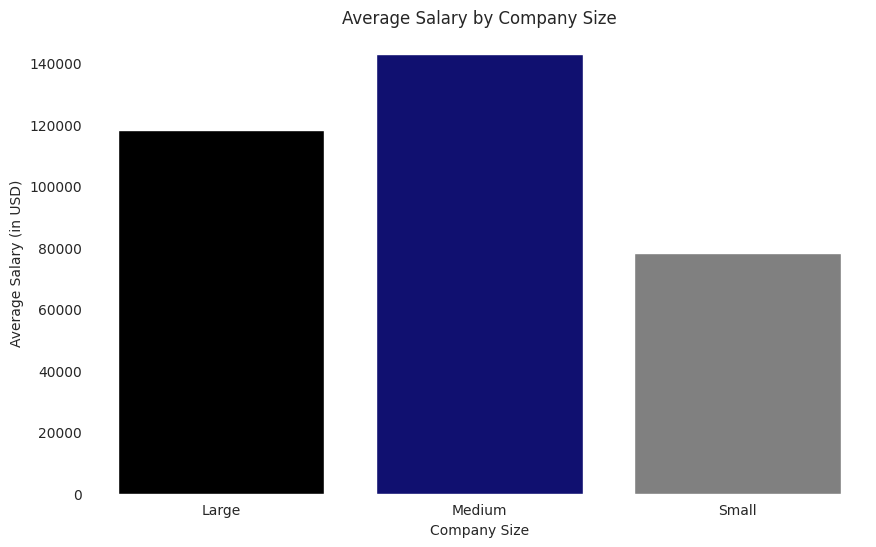

In [ ]:
# Calculate the average salary for each company size
company_size_salary = data.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Create a bar plot for average salary based on company size with specified colors
colors = ['black', 'navy', 'grey']
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_salary, x='company_size', y='salary_in_usd', palette=colors, order=['L', 'M', 'S'])
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (in USD)')
plt.xticks(ticks=[0, 1, 2], labels=['Large', 'Medium', 'Small'])
plt.box(False)  # Remove the borders
plt.show()

It's surprising to see that actually Mid sized companies offer better average salary than Large companies in the field on Data Science



### Question 3. Do larger companies tend to attract more experienced talent compared to smaller companies?

In [ ]:
# Calculate the total number of employees for each company size
total_by_company_size = data['company_size'].value_counts()

# Calculate the number of employees for each experience level within each company size
grouped_by_company_experience = data.groupby(['company_size', 'experience_level']).size().reset_index(name='counts')

# Calculate the percentage of experience levels within each company size
grouped_by_company_experience['percentage'] = grouped_by_company_experience.apply(
    lambda row: round((row['counts'] / total_by_company_size[row['company_size']]) * 100, 2), axis=1)

# Pivot the table for better readability
pivot_percentage = grouped_by_company_experience.pivot(index='company_size', columns='experience_level', values='percentage')
pivot_percentage


experience_level     EN    EX     MI     SE
company_size                               
L                 21.93  2.85  29.82  45.39
M                  5.42  3.01  19.73  71.84
S                 33.11  4.05  33.78  29.05

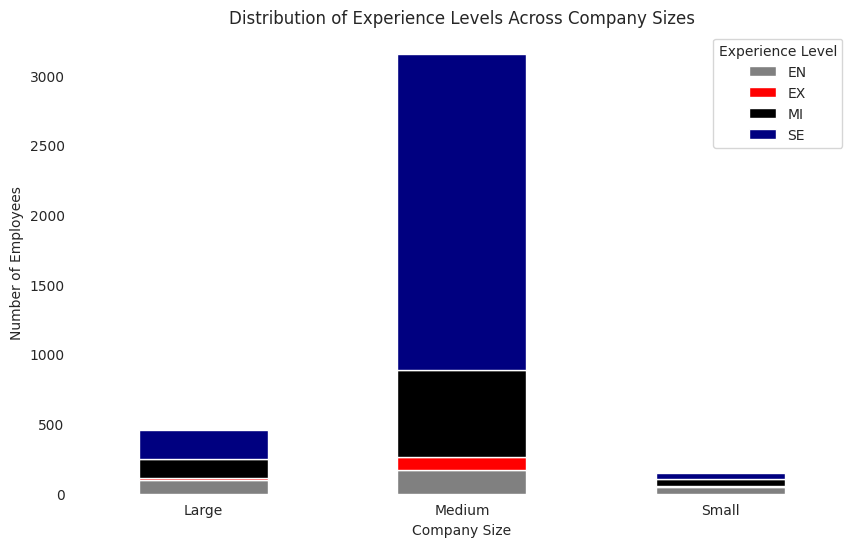

In [ ]:
# Group the data by company size and experience level to get counts
company_experience_counts = data.groupby(['company_size', 'experience_level']).size().reset_index(name='counts')

# Create a pivot table for better visualization
pivot_company_experience = company_experience_counts.pivot(index='company_size', columns='experience_level', values='counts')

# Plot a stacked bar chart
pivot_company_experience.plot(kind='bar', stacked=True, figsize=(10, 6), color=['grey', 'red', 'black', 'navy'])
plt.title('Distribution of Experience Levels Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1, 2], labels=['Large', 'Medium', 'Small'], rotation=0)
plt.legend(title='Experience Level')
plt.box(False)  # Remove the borders
plt.show()

Large companies have a balanced distribution across experience levels, with a slightly higher proportion of Senior employees.

Medium companies have a significant proportion of Senior employees (about 71.84%).

Small companies have a more even distribution across Entry-Level, Mid-Level, and Senior employees, with each category having roughly one-third of the employees.

### Question 4. Which specific job titles in Data Science command the highest salaries?

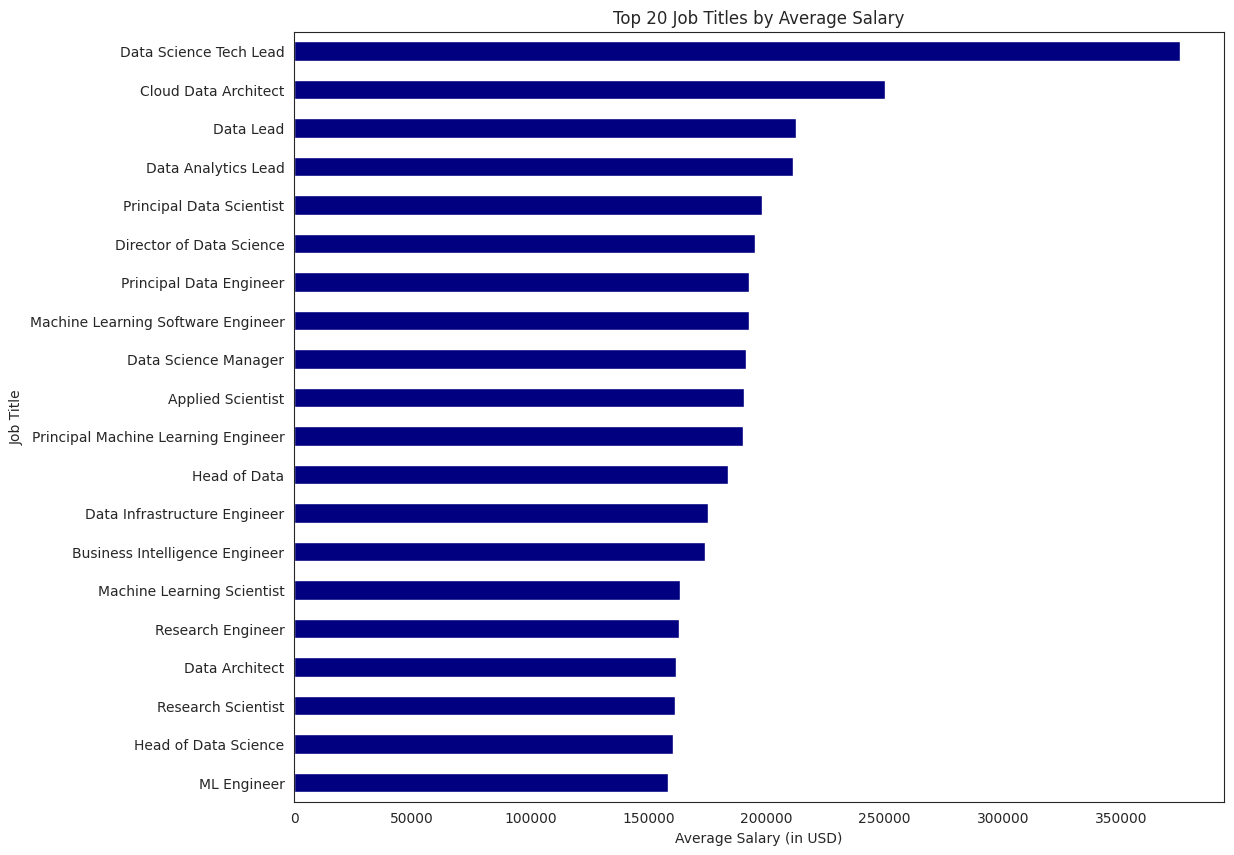

In [ ]:
# Calculate average salary by job title
avg_salary_by_title = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

# Plotting Horizontal Bar Chart
plt.figure(figsize=(12, 10))
avg_salary_by_title.plot(kind='barh', color='navy')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles by Average Salary')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

# Calculate average salary by job title for Tree Map
avg_salary_for_tree_map = data.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Plotting Tree Map
fig = px.treemap(avg_salary_for_tree_map, path=['job_title'], values='salary_in_usd',
                 title='Job Titles by Average Salary', color='salary_in_usd')
fig.show()

Data Science Tech Lead and Cloud Data Architect seems to be commanding higher salaries.

Leadership roles with Data Science skill set seems to be the highest earning roles.

### Question 5. How do data science salaries vary across different countries?

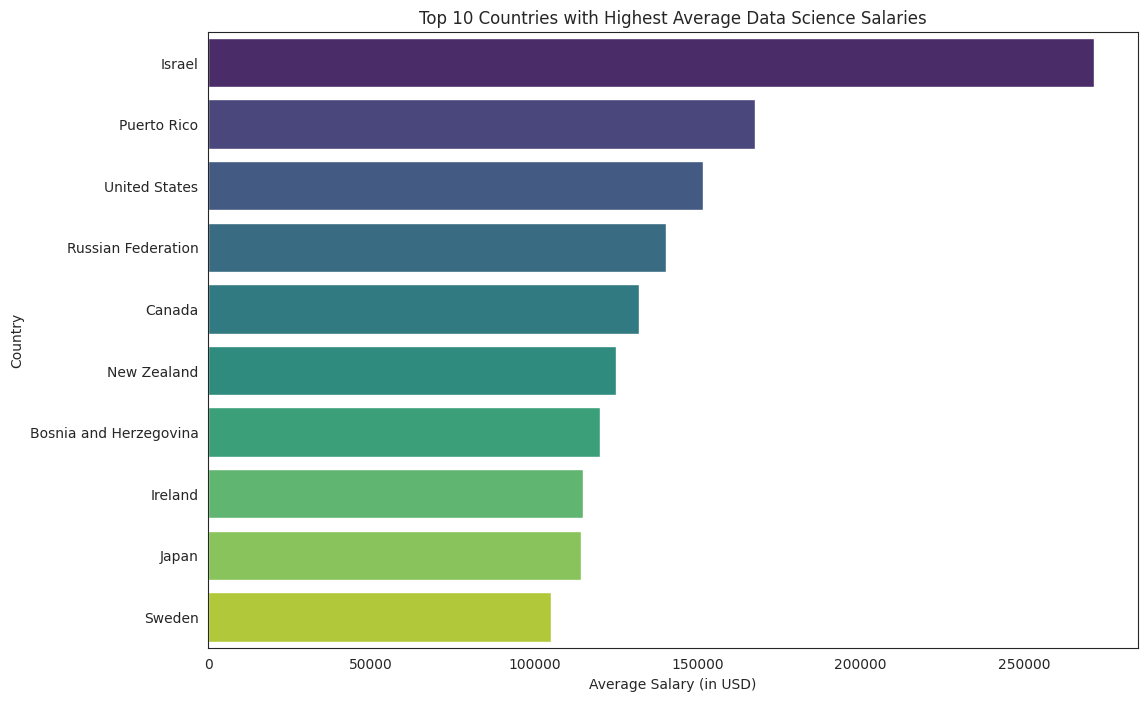

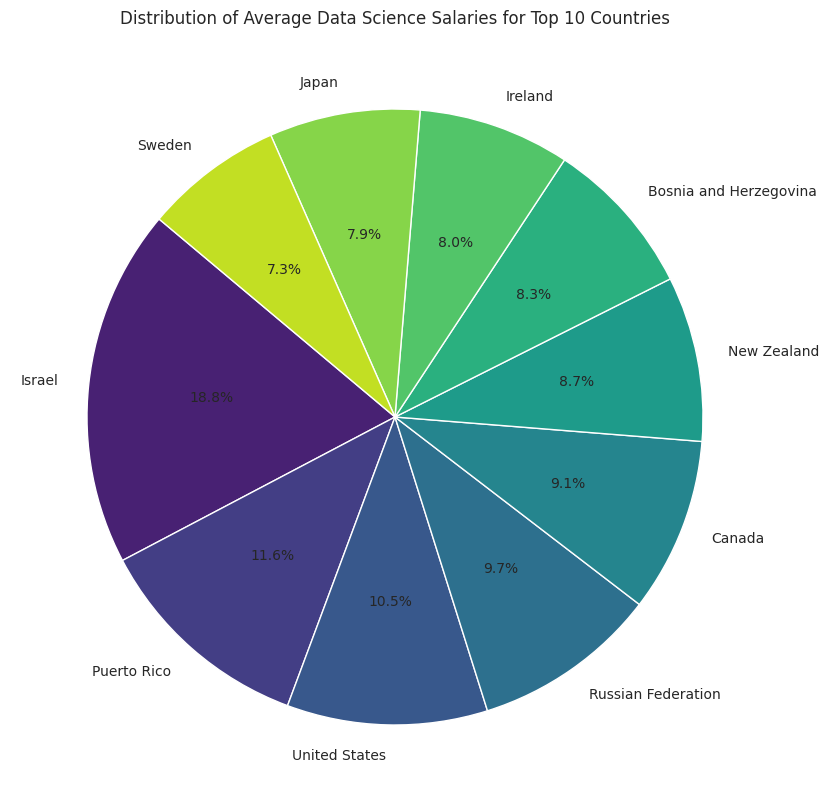

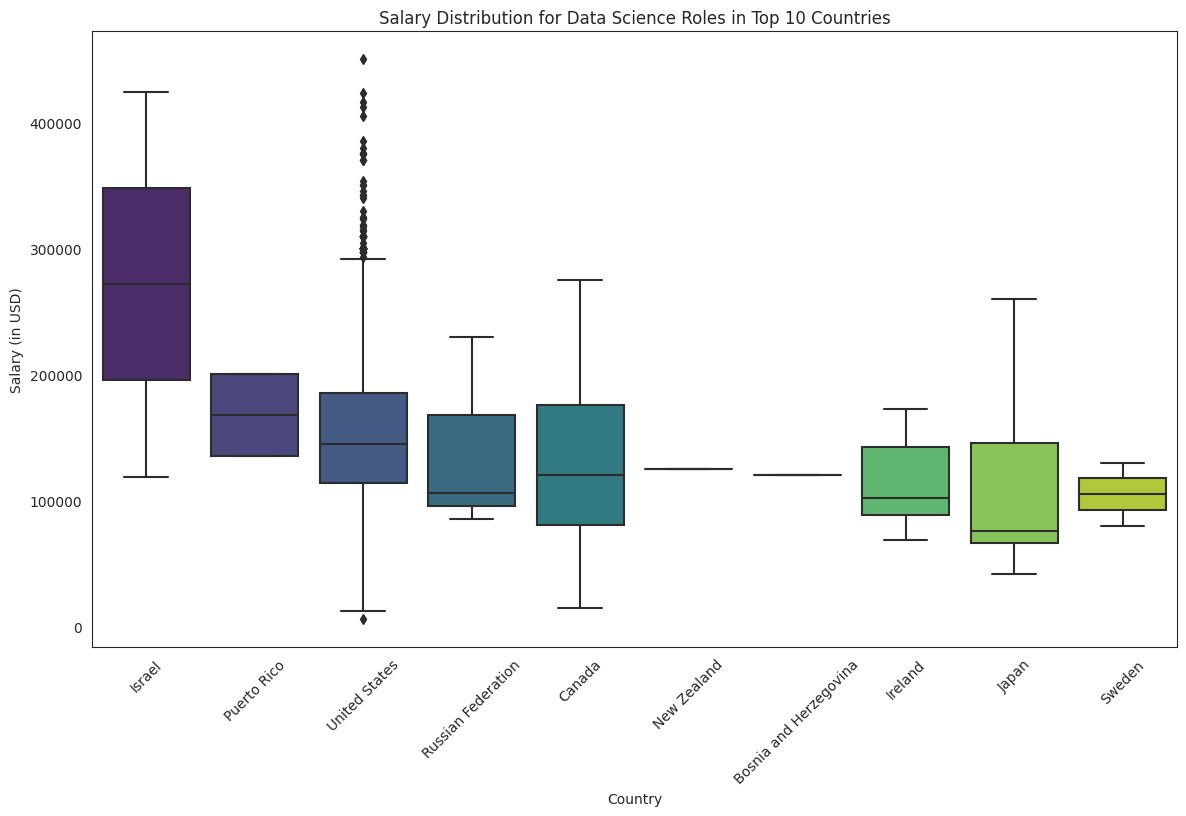

In [ ]:
!pip install pycountry
import pycountry

# Convert country codes to full names
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        return country_code

data['country_name'] = data['company_location'].apply(get_country_name)

# Calculate the average salary by country name
average_salary_by_country_name = data.groupby('country_name')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# 1. Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=average_salary_by_country_name.values, y=average_salary_by_country_name.index, palette='viridis')
plt.title('Top 10 Countries with Highest Average Data Science Salaries')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.show()

# 2. Pie Chart
plt.figure(figsize=(10, 10))
average_salary_by_country_name.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of Average Data Science Salaries for Top 10 Countries')
plt.ylabel('')  # Hide the 'None' label
plt.show()

# 3. Box Plot
# Filter data for the top 10 countries
top_countries_data = data[data['country_name'].isin(average_salary_by_country_name.index)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='country_name', y='salary_in_usd', data=top_countries_data, order=average_salary_by_country_name.index, palette='viridis')
plt.title('Salary Distribution for Data Science Roles in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=45)
plt.show()


So as we can see Israel pays the highest salary followed by Puerto Rico and then the United States

### Question 6. What are the most common job titles in the field on Data Science currently?

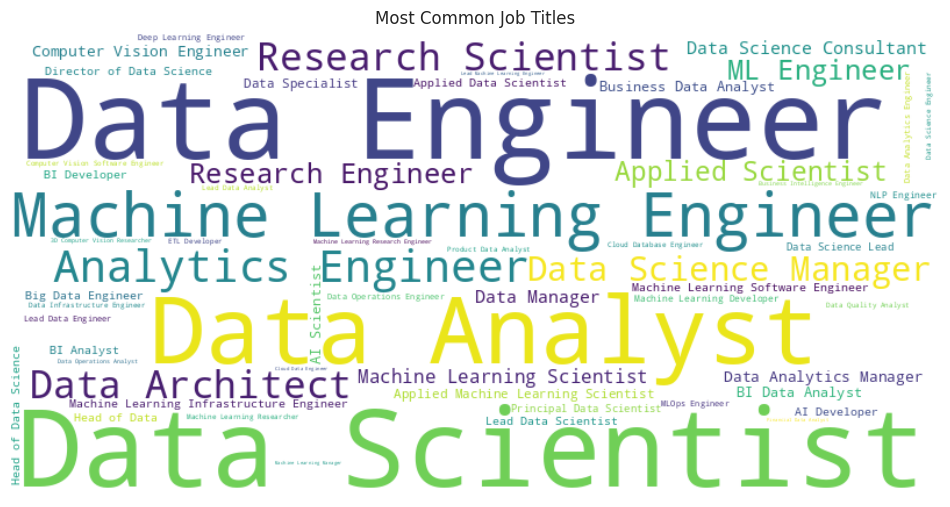

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_cleaned['job_title'].value_counts())

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Job Titles')
plt.show()

### Question 7 Create a dynamic dashboard to better visualise the entire datset.

In [ ]:
%%HTML
<style>
    /* Styling for the container */
    .tableauVisualization {
        border: 1px solid #ddd;
        border-radius: 5px;
        padding: 20px;
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        margin: 20px 0;
    }

    /* Styling for the instruction text */
    .tableauInstruction {
        font-size: 16px;
        margin-bottom: 20px;
        color: #555;
    }
</style>

<div class='tableauVisualization'>
    <!-- Instruction for users -->
    <div class='tableauInstruction'>
        Explore the visualization below to understand the salary distribution for various data science roles across the world. Use the dropdown menu to filter by experience level.
    </div>

    <div class='tableauPlaceholder' id='viz1694604063858' style='position: relative'>
        <noscript>
            <a href='#'>
                <img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book_16942609281800&#47;Dashboard3&#47;1_rss.png' style='border: none' />
            </a>
        </noscript>
        <object class='tableauViz' style='display:none;'>
            <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
            <param name='embed_code_version' value='3' />
            <param name='site_root' value='' />
            <param name='name' value='Book_16942609281800&#47;Dashboard3' />
            <param name='tabs' value='no' />
            <param name='toolbar' value='yes' />
            <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book_16942609281800&#47;Dashboard3&#47;1.png' />
            <param name='animate_transition' value='yes' />
            <param name='display_static_image' value='yes' />
            <param name='display_spinner' value='yes' />
            <param name='display_overlay' value='yes' />
            <param name='display_count' value='yes' />
            <param name='language' value='en-US' />
        </object>
    </div>
    <script type='text/javascript'>
        var divElement = document.getElementById('viz1694604063858');
        var vizElement = divElement.getElementsByTagName('object')[0];
        if (divElement.offsetWidth > 800) {
            vizElement.style.width = '1200px';
            vizElement.style.minHeight = '587px';
            vizElement.style.maxHeight = '887px';
            vizElement.style.height = (divElement.offsetWidth * 0.75) + 'px';
        } else if (divElement.offsetWidth > 500) {
            vizElement.style.width = '1200px';
            vizElement.style.minHeight = '587px';
            vizElement.style.maxHeight = '887px';
            vizElement.style.height = (divElement.offsetWidth * 0.75) + 'px';
        } else {
            vizElement.style.width = '100%';
            vizElement.style.height = '977px';
        }
        var scriptElement = document.createElement('script');
        scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
        vizElement.parentNode.insertBefore(scriptElement, vizElement);
    </script>
</div>



NOTE: Above HTML Script referrenced from: kaggle.com. (n.d.). 📊 Data Science Salary Analysis. [online] Available at: https://www.kaggle.com/code/adilashrafi/data-science-salary-analysis [Accessed 19 Sep. 2023].

‌

In [ ]:
from google.colab import files
files.upload()

Saving M512_KV.ipynb to M512_KV.ipynb
Saving plotly.js to plotly.js


{'M512_KV.ipynb': b'{\n  "nbformat": 4,\n  "nbformat_minor": 0,\n  "metadata": {\n    "colab": {\n      "provenance": []\n    },\n    "kernelspec": {\n      "name": "python3",\n      "display_name": "Python 3"\n    },\n    "language_info": {\n      "name": "python"\n    }\n  },\n  "cells": [\n    {\n      "cell_type": "code",\n      "source": [\n        "from IPython import display\\n",\n        "display.Image(\\"Page1.jpg\\")"\n      ],\n      "metadata": {\n        "colab": {\n          "base_uri": "https://localhost:8080/",\n          "height": 1000\n        },\n        "id": "7x9_df8Yp5Dh",\n        "outputId": "9d0a10c3-9050-4fee-cf2d-d4756bafc0fb"\n      },\n      "execution_count": 92,\n      "outputs": [\n        {\n          "output_type": "execute_result",\n          "data": {\n            "image/jpeg": "/9j/4AAQSkZJRgABAQAAyADIAAD/4gogSUNDX1BST0ZJTEUAAQEAAAoQAAAAAAIQAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAA

In [ ]:
!jupyter nbconvert --to html M512_KV.ipynb

[NbConvertApp] Converting notebook M512_KV.ipynb to html
[NbConvertApp] Writing 2822387 bytes to M512_KV.html
